In [1]:
# 선형 회귀 파이썬 1
# 임포트 
import numpy as np
import matplotlib.pyplot as plt
import typing as T


In [2]:
# 초기값 설정
w = 0 # 기울기
b = 0 # y절편
learning_rate = 0.01 # 학습률
epochs = 3000 # 학습 횟수

# 데이터
X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])



In [3]:
# improve class

class LinearRegressionModel:
    def __init__ (self, X, y, transformation_w, transformation_b):
        self._transformation_w = transformation_w
        self._transformation_b = transformation_b
        self._X = X
        self._y = y
        # print(transformation_w, transformation_b)

    def improve_ (self, w, b):
        y_pred = w * self._X + b
        error = (y_pred - self._y)
        dw = self._transformation_w(error=error, X=self._X, y=self._y)
        db = self._transformation_b(error=error, X=self._X, y=self._y)
        return dw, db
    
    def train (self, w, b, learning_rate, epochs):
        for _ in range(epochs):
            dw, db = self.improve_(w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
        
        def model(X_new):
            return w * X_new + b
        
        return w, b, model
    

    



In [4]:
# 변환 함수
def transformation_w(error, X, y):
    # 자료의 갯수
    n = float(len(X))
    dw = (2/n) * sum(X * error)
    return dw

def transformation_b(error, X, y):
    # 자료의 갯수
    n = float(len(X))
    db = (2/n) * sum(error)
    return db

ModelFactory = LinearRegressionModel(X, y, transformation_w=transformation_w, transformation_b=transformation_b)

In [5]:
# 모델 만들기
w, b, model = ModelFactory.train(w, b, learning_rate, epochs)    

w: 1.25, b: 2.75
모델 확인 > X: [10. 20.], y: [15.25000038 27.75000082]


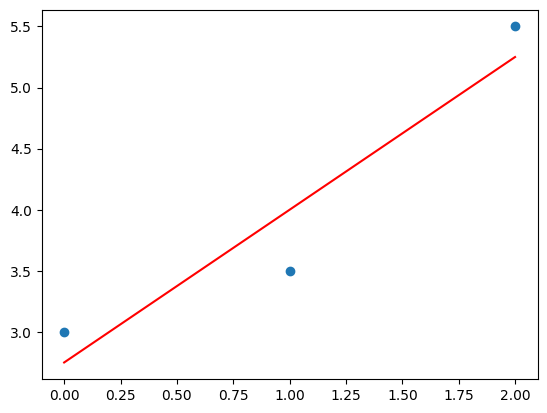

In [7]:
# 결과 출력
print(f'w: {w:.2f}, b: {b:.2f}')

# 예측값 
y_pred = model(X)

# 모델 확인
X_new = np.array([10.0, 20.0])
y_new = model(X_new)
print(f'모델 확인 > X: {X_new}, y: {y_new}')

# 그래프 출력
plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()


In [ ]:
# 사이킷 런 이용하기
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression

# linear regression 모델
lin_reg = LinearRegression()

# 데이터를 2차원으로 변환
X_1 = [[0], [1], [2]] # 2차원으로 변환
y_1 = [3, 3.5, 5.5] # y = x + 3

# 모델 학습
lin_reg.fit(X_1, y_1)



In [ ]:
# 출력
print(f'w: {lin_reg.coef_[0]:.2f}, b: {lin_reg.intercept_:.2f}')

# 예측 테스트 
y_pred_1 = lin_reg.predict([[5]]) # x = 5일때 예측값 8 정도
print(f'입력: 5, 예측: {y_pred_1[0]:.2f}')

# 그래프
plb.scatter(X_1, y_1, color='black')

# 예측값
y_pred_1 = lin_reg.predict(X_1)

# 그래프 출력
plt.plot(X_1, y_pred_1, color='blue', linewidth=3)
plt.show()

